In [1]:
using Pkg;
Pkg.add("DocStringExtensions")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots");
# include("parameterselection.jl")
# include("Preprocessing.jl");
# include("Potential_Evaporation.jl");
# include("processes_buckets.jl");
# include("elevations.jl");
# include("allHRU.jl")
# include("run_model.jl");

    Updating registry at `C:\Users\Vincent Hoogelander\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Vincent Hoogelander\.julia\environments\v1.7\Manifest.toml`


## Parameters

In [2]:
include("parameterselection.jl")
include("structs.jl")
include("processes_buckets.jl")
include("elevations.jl")
include("allHRU.jl")
include("run_model.jl")

run_model_glacier_future

In [3]:
parameters, slow_parameters,parameters_array =  parameter_selection()
bare_parameters = parameters[1]
forest_parameters = parameters[2]
grass_parameters = parameters[3]
rip_parameters = parameters[4]

Parameters(1.816, 0.595, 0.0, 0.667, 0.365, 4.524, 0.9874, 0.156, 33.76, 1.698)

## Forcing

In [4]:
using DataFrames
using CSV
forcing = CSV.read("forcingWark.csv", DataFrame)

,DATE,Tmax,Tmin,prec,T,Discharge,ETP
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,2001-08-01,26.2,14.9,0.0,20.55,0.0929,4.002
2,2001-08-02,28.3,16.5,1.0,22.4,0.09086,4.2
3,2001-08-03,23.3,16.1,1.5,19.7,0.10281,3.8
4,2001-08-04,20.8,13.0,1.7,16.9,0.10328,3.0
5,2001-08-05,21.0,10.6,4.9,15.8,0.10178,2.9
6,2001-08-06,19.6,13.8,7.4,16.7,0.11368,3.0
7,2001-08-07,19.8,14.4,11.7,17.1,0.13945,3.0
8,2001-08-08,19.4,13.1,13.5,16.25,0.60147,2.9
9,2001-08-09,19.8,11.2,1.0,15.5,0.28755,2.802


## Storages

In [5]:
bare_storage = Storages(0, zeros(1), zeros(1), zeros(1), 0)
forest_storage = Storages(2, zeros(1), zeros(1), zeros(1), 0)
grass_storage = Storages(0, zeros(1), zeros(1), zeros(1), 0)
rip_storage = Storages(0, zeros(1), zeros(1), zeros(1), 0)
Slowstorage = (0.0)

0.0

## Model

### Test for one HRU

In [6]:
hill = HRU_Input([1], 1, [0], [1], 1, Tuple(1), Tuple(0), 1, [13], 13, [22], 0, 0.0)

hill_out, hill_storages, Precipitation, All_Storages = hillslopeHRU(hill, forest_storage, forest_parameters)
hill_out

Outflows(0.73, 0.0, 0.04124859160561871, 0.5)

### Test for all HRU + Slow

In [7]:
bare_input = HRU_Input([1], 1, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.01, [0], 0, 0.0)
forest_input = HRU_Input([1], 1, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.01, [0], 0, 0.0)
grass_input = HRU_Input([1], 1, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.01, [0], 0, 0.0)
rip_input = HRU_Input([1], 1, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.01, [0], 0, 0.0)


HRU_Input([1.0], 1.0, [0.0], [1], 1, (0,), (0,), 0.0, [0.0], 0.01, [0.0], 0.0, 0.0)

In [8]:
Riparian_Discharge, Total_Discharge, Total_Interception_Evaporation, Total_Soil_Evaporation, bare_storage, forest_storage, grass_storage, rip_storage, Slowstorage, WB, Total_Prec = allHRU(bare_input, forest_input, grass_input, rip_input,
                                                                                                            bare_storage, forest_storage, grass_storage, rip_storage,
                                                                                                            bare_parameters, forest_parameters, grass_parameters, rip_parameters,
                                                                                                            Slowstorage, slow_parameters)

(0.0, 0.73, 0.0, 0.0, Storages(0.0, [0.0], [0.0], [0.0], 0.0), Storages(1.27, [0.0], [0.0], [0.0], 0.0), Storages(0.0, [0.0], [0.0], [0.0], 0.0), Storages(0.0, [0.0], [0.0], [0.0], 0.01), 0.0, -8.673617379884035e-18, 0.0)

## Run whole model

In [9]:
parameters, slow_parameters,parameters_array =  parameter_selection()
bare_parameters = parameters[1]
forest_parameters = parameters[2]
grass_parameters = parameters[3]
rip_parameters = parameters[4]

Parameters(0.578, 0.401, 0.0, 1.496, 0.213, 3.589, 0.322, 0.536, 61.58, 1.252)

In [10]:
Area = 1
Evaporation_Mean = forcing.ETP
Precipitation = ones(length(forcing.ETP), 2)
Precipitation[:, 1]  = forcing.prec
Temp = ones(length(forcing.T), 2)
Temp[:, 1]  = forcing.T
Total_Elevationbands = 1
Elevation_Percentage = 1

1

In [11]:
Discharge, Snow_Extend, Waterbalance = run_model(Area, Evaporation_Mean, Precipitation, Temp,
                bare_input, forest_input, grass_input, rip_input,
                bare_storage, forest_storage, grass_storage, rip_storage, Slowstorage,
                bare_parameters, forest_parameters, grass_parameters, rip_parameters, slow_parameters, Total_Elevationbands, Elevation_Percentage)


([0.27051019993215125, 0.21289152734660305, 0.16938100437294007, 0.1386271971052375, 0.13936370294806094, 0.2752139263451313, 0.7920783026955501, 1.909088642494192, 1.587082940655136, 1.4788287182608741  …  0.2622230665925871, 0.24724707853025046, 0.23908184572071983, 0.22716631644809926, 0.3262498087086736, 0.3541521617099349, 0.3166962885452441, 0.28598623873999135, 0.6402776445784052, 0.568274228066836], [0.0; 0.0; … ; 0.0; 0.0;;], 2.7341844066608445e-13)

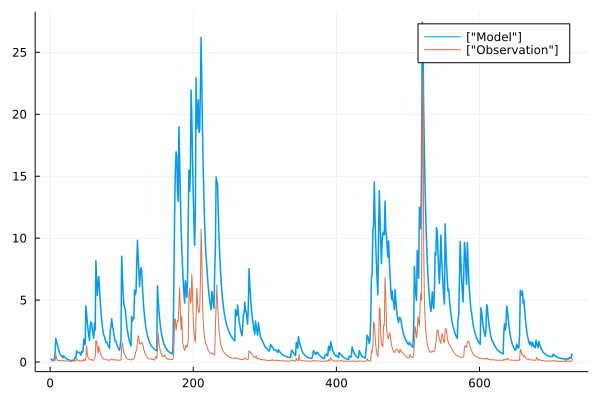

In [12]:
using Plots
plot(Discharge, label=["Model"], lw=1.5)
plot!(forcing.Discharge, label=["Observation"], lw=1)

# plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

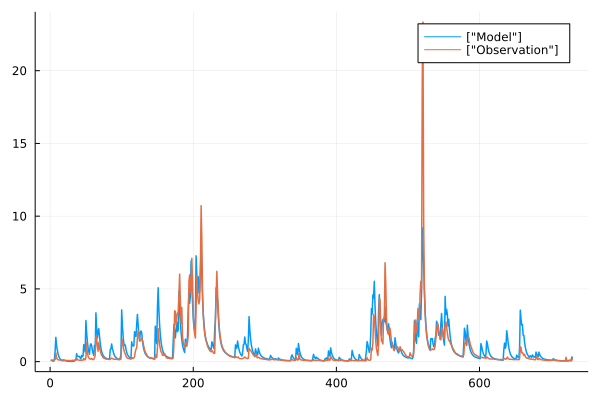

In [236]:
parameters, slow_parameters,parameters_array =  parameter_selection()
bare_parameters = parameters[1]
forest_parameters = parameters[2]
grass_parameters = parameters[3]
rip_parameters = parameters[4]

bare_input = HRU_Input([1], 0.0, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.1, [0], 0, 0.0)
forest_input = HRU_Input([1], 0.3, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.1, [0], 0, 0.0)
grass_input = HRU_Input([1], 0.3, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.1, [0], 0, 0.0)
rip_input = HRU_Input([1], 0.4, [0], [1], 1, Tuple(0), Tuple(0), 0, [0], 0.1, [0], 0, 0.0)

Area = 1
Evaporation_Mean = forcing.ETP
Precipitation = ones(length(forcing.ETP), 2)
Precipitation[:, 1]  = forcing.prec
Temp = ones(length(forcing.T), 2)
Temp[:, 1]  = forcing.T
Total_Elevationbands = 1
Elevation_Percentage = 1

Discharge, Snow_Extend, Waterbalance = run_model(Area, Evaporation_Mean, Precipitation, Temp,
                bare_input, forest_input, grass_input, rip_input,
                bare_storage, forest_storage, grass_storage, rip_storage, Slowstorage,
                bare_parameters, forest_parameters, grass_parameters, rip_parameters, slow_parameters, Total_Elevationbands, Elevation_Percentage)
using Plots
plot(Discharge, label=["Model"], lw=1.5)
plot!(forcing.Discharge, label=["Observation"], lw=1.5)



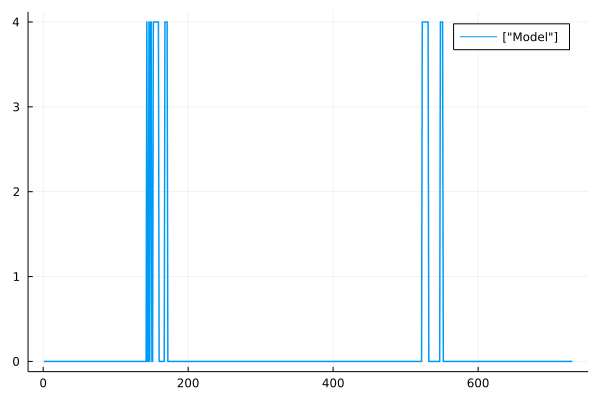

In [119]:
plot(Snow_Extend, label=["Model"], lw=1.5)